## Initialisation

### Dependencies

#### Third party

In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### Personal Notebook

An index file already exists for Additive Manufactured SS 316L. Do you want to re-initalise? (Y/n): Y
An index file already exists for AA 2195 T8. Do you want to re-initalise? (Y/n): y
An index file already exists for AA 2195 Solutionized. Do you want to re-initalise? (Y/n): y
An index file already exists for AA 2195 T76. Do you want to re-initalise? (Y/n): y
An output file already exists for Additive Manufactured SS 316L. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 T8. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 Solutionized. Do you want to re-initalise? (Y/n): y
An output file already exists for AA 2195 T76. Do you want to re-initalise? (Y/n): y


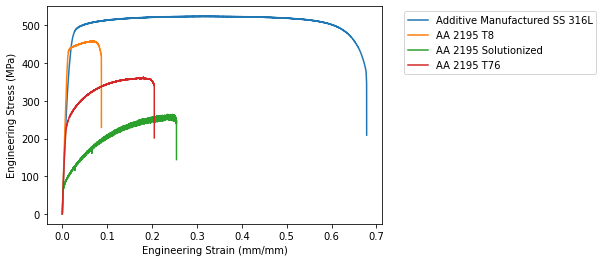

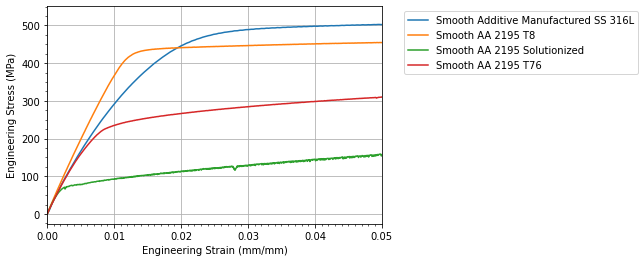

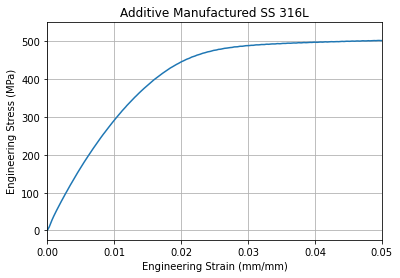

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in Additive Manufactured SS 316L's dataset: 0.015
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 400
Young's Modulus: 24.528471752330667 GPa


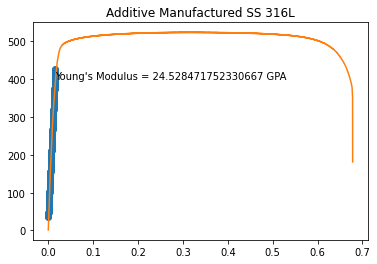

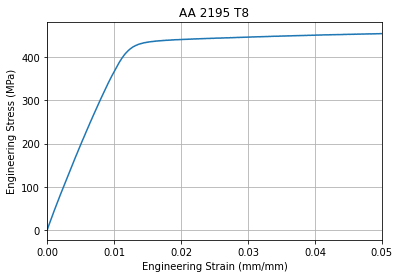

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 T8's dataset: 0.008
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 380
Young's Modulus: 36.48769816619972 GPa


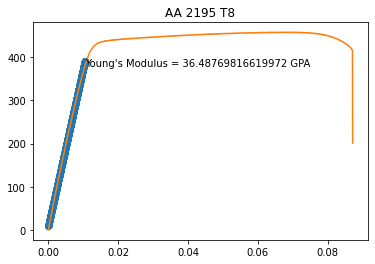

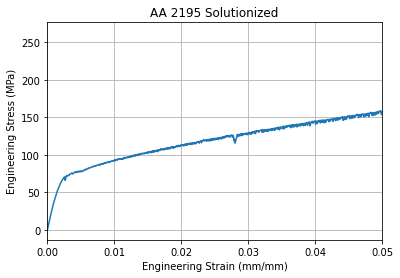

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 Solutionized's dataset: 0.003
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 59
Young's Modulus: 33.30362311848422 GPa


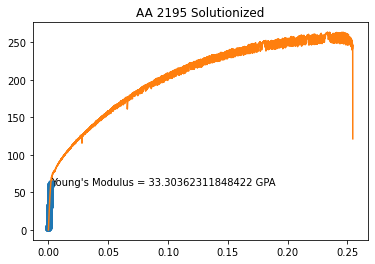

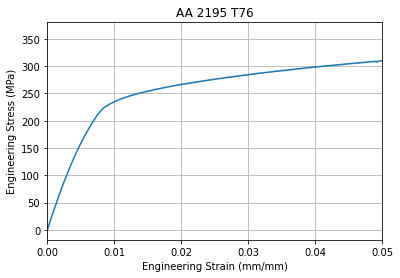

Enter the value of engineering strain upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in AA 2195 T76's dataset: 0.007
Enter the value of engineering stress upto which the line seems linear (used in calculation of Youngs modulus) in the units same as in dataset: 222
Young's Modulus: 26.992714051872607 GPa


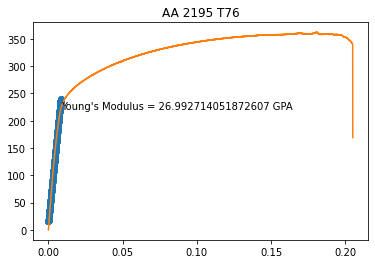

Yield Strength: 447.88676 MPa


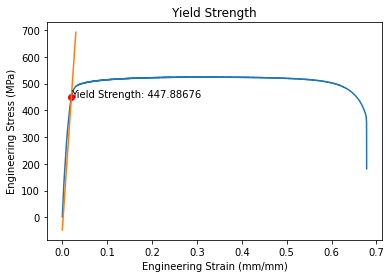

Yield Strength: 430.610596 MPa


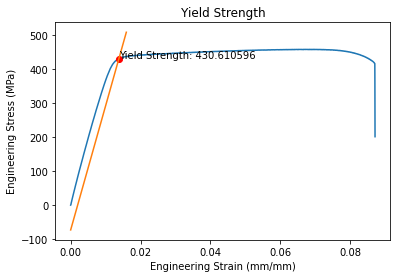

Yield Strength: 76.769819 MPa


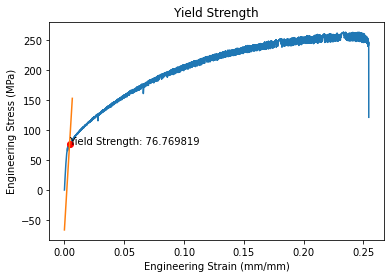

Yield Strength: 238.88962400000003 MPa


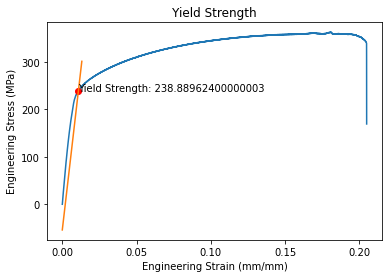

Ultimate Tensile Strength is 524.425548 MPa at 31.816329999999997% elongation.
Ultimate Tensile Strength is 457.9231510000001 MPa at 6.798% elongation.
Ultimate Tensile Strength is 263.639546 MPa at 23.327% elongation.
Ultimate Tensile Strength is 362.20079200000004 MPa at 18.095% elongation.


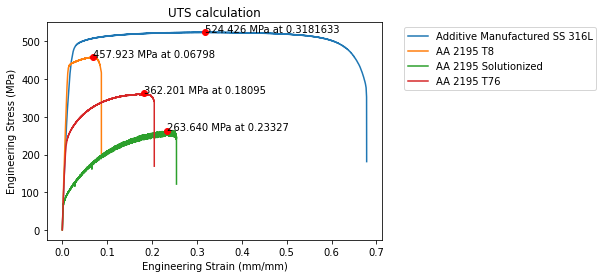

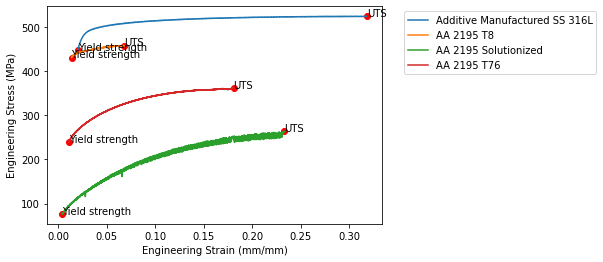

In [2]:
import ipynb

from ipynb.fs.full.dataset_initialisation import (
    ifile,
    ofile,
    OUTPUT_DIR,
    COMBINED_OUTPUT_DIR,
    PROJECT_NAME
)

youngs_modulus = [i.get_parameter('youngs_modulus') for i in ifile]
if youngs_modulus is None:
    from ipynb.fs.full.engineering_strain_stress import (
        youngs_modulus,
    )

yield_strength = [i.get_parameter('yield_strength') for i in ifile]
if yield_strength is None:
    from ipynb.fs.full.engineering_strain_stress import (
        yield_strength,
    )

x_plastic_region = []
y_smooth_plastic_region = []
for i in range(len(OUTPUT_DIR)):    
    if (os.path.exists(f'{OUTPUT_DIR[i]}/plastic_region.csv')):
        df = pd.read_csv(f'{OUTPUT_DIR[i]}/plastic_region.csv', sep=',', names=['x','y'])
        x_plastic_region.append(df['x'])
        y_smooth_plastic_region.append(df['y'])
else:
    from ipynb.fs.full.engineering_strain_stress import (
        x_plastic_region,
        y_smooth_plastic_region,
    )   

### Notations

- $\sigma \rightarrow$ True Stress
- $\epsilon \rightarrow$ True Strain
- $\epsilon_{pl} \rightarrow$ True Plastic Strain
- $\sigma_{ys} \rightarrow$ Yield Strength
- $\sigma_{uts} \rightarrow$ Ultimate Tensile Strength
- $n \rightarrow$ Work hardening Exponent
- $E \rightarrow$ Young's Modulus
- $K \rightarrow$ Strength Coefficient
- $e \rightarrow$ Engineering Strain
- $s \rightarrow$ Engineering Stress
- $\theta \rightarrow$ Work hardening rate
- $\sigma - \sigma_{ys} \rightarrow$ Flow Stress

## Plot of True Strain v/s True Stress

### $\epsilon$ v/s $\sigma$

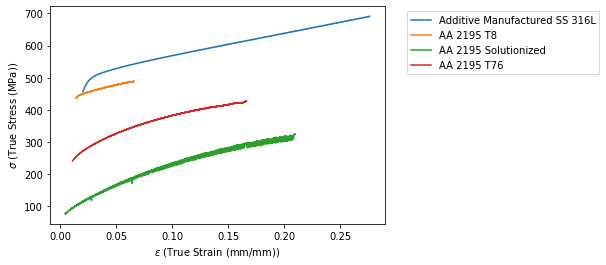

In [5]:
fig, ax = plt.subplots(1,1)

true_strain = []
true_stress = []

for i in range(len(x_plastic_region)):
    true_strain.append(np.log([j+1 for j in x_plastic_region[i]]))
    true_stress.append([y_smooth_plastic_region[i][j]*(1+x_plastic_region[i][j]) for j in range(len(x_plastic_region[i]))])
    ax.plot(true_strain[i], true_stress[i])


ax.set_xlabel('$\epsilon$ (True Strain (mm/mm))')
ax.set_ylabel('$\sigma$ (True Stress (MPa))')
ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(f'{COMBINED_OUTPUT_DIR}/True stress vs strain', facecolor='white', transparent=True)

## Plot of True Plastic Strain v/s True Stress


### Definition of true plastic strain

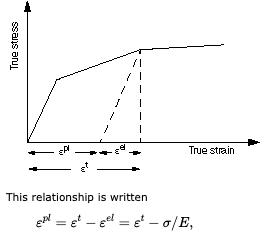

### $\epsilon_{pl}$ v/s $\sigma$


In [7]:
youngs_modulus

[None, None, None, None]

TypeError: unsupported operand type(s) for /: 'float' and 'NoneType'

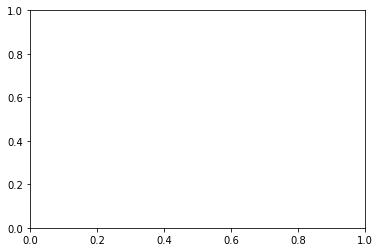

In [6]:
true_plastic_strain = []

fig, ax = plt.subplots(1,1)

for i in range(len(true_strain)):
    true_plastic_strain.append([(true_strain[i][j] - float(true_stress[i][j]/youngs_modulus[i])) for j in range(len(true_strain[i]))])
    ax.plot(true_plastic_strain[i], true_stress[i])

_ = ax.set_xlabel('$\epsilon_{pl}$ (True Plastic Strain (mm/mm))')
_ = ax.set_ylabel('$\sigma$ (True Stress (MPa))')
ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
plt.savefig(f'{COMBINED_OUTPUT_DIR}/True stress vs plastic strain', facecolor='white', transparent=True)

### Plot of $\epsilon$ v/s flow stress ($\sigma - \sigma_{ys}$)

In [ ]:
flow_stress = []

fig, ax = plt.subplots(1,1)
for i in range(len(true_stress)):
    flow_stress.append(np.subtract(true_stress[i], float(yield_strength[i])))
    ax.plot(true_strain[i], flow_stress[i])

ax.set_xlabel('$\epsilon$ (True strain)')
ax.set_ylabel('$\sigma - \sigma_{ys}$')
ax.legend(PROJECT_NAME, loc='upper left', bbox_to_anchor=(1.05, 1))
fig.savefig(f'{COMBINED_OUTPUT_DIR}/Flow stress vs True strain', facecolor='white', transparent=True)

If you are getting a high initial values of $ \sigma - \sigma_{ys}$, it is because of excessive machine elongation during tensile testing. Either the machine is not stiff or there is some slipping between the clamps and the specimen.

In [ ]:
# True strain v/s true stress
for i in range(len(true_strain)):
    pd.DataFrame(
        np.transpose(np.asarray([true_strain[i], true_stress[i]], dtype=object))
    ).to_csv(f'{OUTPUT_DIR[i]}/true_strain_vs_true_stress.csv', index=False, header=False)

# True plastic strain v/s true stress
for i in range(len(true_strain)):
    pd.DataFrame(
        np.transpose(np.asarray([true_plastic_strain[i], true_stress[i]], dtype=object))
    ).to_csv(f'{OUTPUT_DIR[i]}/true_plastic_strain_vs_true_stress.csv', index=False, header=False)

# True strain v/s Flow stress
for i in range(len(true_strain)):
    pd.DataFrame(
        np.transpose(np.asarray([true_strain[i], flow_stress[i]], dtype=object))
    ).to_csv(f'{OUTPUT_DIR[i]}/true_strain_vs_flow_stress.csv', index=False, header=False)